<a href="https://colab.research.google.com/github/2016130714/class2021Spring/blob/main/numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NumPy basics

## 1. Creation

In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
np.empty([4, 3], dtype = 'int') #4*3의 행렬을 만듦. 랜덤한 숫자 배정

array([[94676212922912, 94676231409664, 94673964105736],
       [94676231409664,              8, 94676231409664],
       [             9,              0, 94676231410176],
       [94676231410176, 94676231410176,              0]])

In [ ]:
type(np.empty([2, 3])[0][0]) #따로 dtype을 설정하지 않으면 기본은 float

numpy.float64

In [ ]:
np.zeros([3, 2])  #0뒤에 .점이 붙어있음. 즉, float임

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
np.zeros([2,3], dtype = 'int')   #dtype을 설정하면, 바꿀 수 있다.

array([[0, 0, 0],
       [0, 0, 0]])

In [ ]:
np.arange(0, 10, 2, dtype = 'float64')  #range와 동일

array([0., 2., 4., 6., 8.])

In [ ]:
np.linspace(0, 10, 6, dtype = float) #start(0)부터 stop(10)까지 n(6)개의 linear 원소 출력.
#이런 숫자열을 vector라고 한다.

array([ 0.,  2.,  4.,  6.,  8., 10.])

In [ ]:
X = np.array([[1, 2, 3], [4, 5, 6]]) #2차원 행렬
print(X)
X.astype(np.float64)     #X의 데이터를 float으로 변경

[[1 2 3]
 [4 5 6]]


array([[1., 2., 3.],
       [4., 5., 6.]])

In [ ]:
np.zeros_like(X)  #X의 원소를 0으로 바꿈. 크기가 같은 영행렬

array([[0, 0, 0],
       [0, 0, 0]])

[-1.75745728  0.33146256  1.67239196 -0.26545802 -1.45181955 -1.46790631
  3.77649317 -0.399688   -2.78929927 -0.69386246 -1.86853787 -2.57334888
  0.51188    -2.33913321  0.76560386 -0.46973829  2.52831648  1.89619754
 -2.27306712 -3.53139493 -4.16150424  2.41149616 -2.20722632 -0.09787722
 -0.50909858 -1.35851366 -1.4975589  -4.33905862 -0.93190759 -1.69250207
  0.35866996 -1.2447866  -1.35019625  0.2102008   3.25785102  1.79859989
  2.16599656 -3.4806361   0.59487101  0.32467849 -3.02530731  1.69655307
 -1.84157793 -2.00257545 -1.53243682  2.4087559   1.46812083  0.3578533
  2.87089483 -2.61686788  3.37922671  2.099801    0.36056345 -3.08236465
  2.99087429  2.8417055   4.15335983  0.96281347  0.22275236 -2.24650877
 -2.04449848  2.16868501 -2.20382411 -2.46205593 -2.53746862  0.78805938
 -2.87552328 -2.30483637 -4.3232679  -1.38775306]


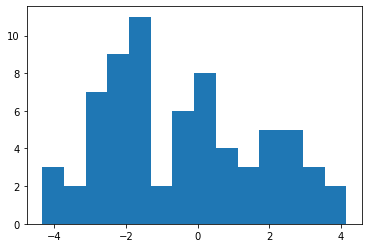

In [ ]:
data = np.random.normal(0, 2, 70)  #랜덤 데이터 추출. 평균 0, 표준편차 2, 숫자 70개
print(data)                         #랜덤이므로, 실행할 때마다 데이터/그래프 바뀜
plt.hist(data, bins = 14) #histogram을 만든다.
#bins: 몇 개이 바구니 안에 담을지(70개 데이터를 14개의 막대로)
plt.show()

## 2. Manipulation

In [ ]:
X = np.ones([2, 3, 4]); print(X)    #모든 원소가 1인 2*3*4의 3차원 행렬
Y = X.reshape(-1, 2, 3); print(Y)   #-1의 역할: reshape할 때 같은 크기의 행렬로만 가능한데,
#입력하지 않은 차원의 크기를 알아서 넣어줌

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]
[[[1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]]]


In [ ]:
np.allclose(X.reshape(-1, 2, 3), Y)

True

In [ ]:
np.allclose(X.reshape(-1, 3, 2), Y)

True

In [ ]:
assert np.allclose(X.reshape(-1, 2, 3), Y)

## 3. NumPy I/O

In [ ]:
a = np.random.randint(0, 10, [2, 3])
b = np.random.random([2, 3])
np.savez("test", a, b)

In [ ]:
!ls -al test*

-rw-r--r--  1 jookai  staff     562 Apr  2 00:35 test.npz
-rw-r--r--  1 jookai  staff  123438 Mar 14 23:19 test.wav


In [ ]:
del a, b
%who  # Print all interactive variables

No variables match your requested type.


In [ ]:
npzfiles = np.load("test.npz")
npzfiles.files

['arr_0', 'arr_1']

In [ ]:
npzfiles['arr_0']

array([[1, 5, 2],
       [1, 7, 0]])

In [ ]:
from google.colab import files
uploaded = files.upload()
data = np.loadtxt("regression.csv", delimiter=",", skiprows=1, dtype={'names':("X", "Y"), 'formats':('f', 'f')})
data

Saving regression.csv to regression.csv


In [ ]:
np.savetxt("regression_saved.csv", data, delimiter=",")
!ls -al regression_saved.csv

-rw-r--r-- 1 root root 850 Mar 21 16:33 regression_saved.csv


## 4. Inspecting

In [11]:
arr = np.random.random([3,2,4])   #랜덤한 원소를 가진 3차원 행렬
arr1 =  np.random.random(20)
arr2 = np.random.random([2, 3])
print(arr, "\n", arr1, "\n", arr2)

[[[0.89382668 0.19014758 0.80093426 0.75324836]
  [0.87011128 0.43895565 0.87810896 0.89759906]]

 [[0.39875226 0.57196266 0.84123136 0.49913496]
  [0.31631547 0.50090586 0.77806985 0.7316502 ]]

 [[0.20751488 0.14886798 0.79510504 0.93567732]
  [0.24929386 0.56466311 0.03084267 0.09354586]]] 
 [0.41121447 0.60039122 0.6507816  0.93110113 0.51816263 0.27177151
 0.28108693 0.17086649 0.72118787 0.72703569 0.77292867 0.42757608
 0.45992878 0.62614456 0.63539119 0.48000867 0.62274781 0.79044966
 0.66686227 0.59349423] 
 [[0.43897937 0.42861808 0.2122365 ]
 [0.49178627 0.71801142 0.78252889]]


In [12]:
print(type(arr))
print(len(arr))    #최고 차원이 중요. list의 len은 원소의 수. 무엇이 len인지 유의
print(arr.shape)   #행렬의 모양 3*2*4, 2*3 등
print(arr.ndim)    #몇 차원?
print(arr.size)    #총 원소의 수 (3*2*4 = 24)
print(arr.dtype)   #numpy 행렬들은 기본적으로 float타입.

<class 'numpy.ndarray'>
3
(3, 2, 4)
3
24
float64


## 5. Operations

### 5.1 Arithmetic

In [18]:
a = np.arange(1, 5)
b = np.arange(9, 5, -1); print(a, b)

[1 2 3 4] [9 8 7 6]


In [23]:
print(a - b)
print(a * b) #원래 안되는 행렬 곱셈. 그런데 내부적으로 새 행렬을 생성하여 가능하게 함.
print(a * np.arange(4).reshape(4, -1))   #이렇게 특이하게 곱한다. 유의!!

[-8 -6 -4 -2]
[ 9 16 21 24]
[[ 0  0  0  0]
 [ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]]


In [24]:
a*np.arange(5).reshape(5,1)  #(1*4) * (5*1). 앞 행렬의 row, 뒷 행렬의 column이 같을 때 곱셈 가능

array([[ 0,  0,  0,  0],
       [ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12],
       [ 4,  8, 12, 16]])

In [28]:
a = np.matrix(a)
b = np.matrix(b)
a * b.T

matrix([[70]])

In [16]:
a * b.T

matrix([[70]])

In [17]:
a.T * b

matrix([[ 9,  8,  7,  6],
        [18, 16, 14, 12],
        [27, 24, 21, 18],
        [36, 32, 28, 24]])

### 5.2 Comparison

In [ ]:
a = np.arange(1, 10).reshape(3,3)
b = np.arange(9, 0, -1).reshape(3,3)
print(a)
print(b)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[9 8 7]
 [6 5 4]
 [3 2 1]]


In [ ]:
a == b

array([[False, False, False],
       [False,  True, False],
       [False, False, False]])

In [ ]:
a > b

array([[False, False, False],
       [False, False,  True],
       [ True,  True,  True]])

### 5.3 Aggregate (sum, min, max, mean, median, std)

In [ ]:
a.sum(), np.sum(a)

(45, 45)

In [ ]:
a.sum(axis=0), np.sum(a, axis=0)

(array([12, 15, 18]), array([12, 15, 18]))

In [ ]:
a.sum(axis=1), np.sum(a, axis=1)

(array([ 6, 15, 24]), array([ 6, 15, 24]))

## Broadcasting

In [ ]:
a = np.arange(1, 25).reshape(4, 6)
a

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24]])

In [ ]:
a + 100

array([[101, 102, 103, 104, 105, 106],
       [107, 108, 109, 110, 111, 112],
       [113, 114, 115, 116, 117, 118],
       [119, 120, 121, 122, 123, 124]])

In [ ]:
b = np.arange(6)
b

array([0, 1, 2, 3, 4, 5])

In [ ]:
a + b

array([[ 1,  3,  5,  7,  9, 11],
       [ 7,  9, 11, 13, 15, 17],
       [13, 15, 17, 19, 21, 23],
       [19, 21, 23, 25, 27, 29]])

In [ ]:
c = np.arange(4).reshape([4,1])
c

array([[0],
       [1],
       [2],
       [3]])

In [ ]:
a + c

array([[ 1,  2,  3,  4,  5,  6],
       [ 8,  9, 10, 11, 12, 13],
       [15, 16, 17, 18, 19, 20],
       [22, 23, 24, 25, 26, 27]])